In [2]:
import sys
import os

project_path = r"C:\Users\jjmcc\OneDrive\Documents\Thesis Interim\ITGC-interim"
sys.path.append(project_path)

print("Added to PYTHONPATH:", project_path)






Added to PYTHONPATH: C:\Users\jjmcc\OneDrive\Documents\Thesis Interim\ITGC-interim


In [3]:
from alternative_image_clustering.data.mri_dataset import MRIDataset
ds = MRIDataset(r"E:\Testing")
len(ds)


136

In [5]:
image, mask, path = ds[0]

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("File loaded:", path)


Image shape: torch.Size([512, 440, 13, 26])
Mask shape: torch.Size([512, 440, 13, 26])
File loaded: E:\Testing\G8K0M3\G8K0M3_sa.nii.gz


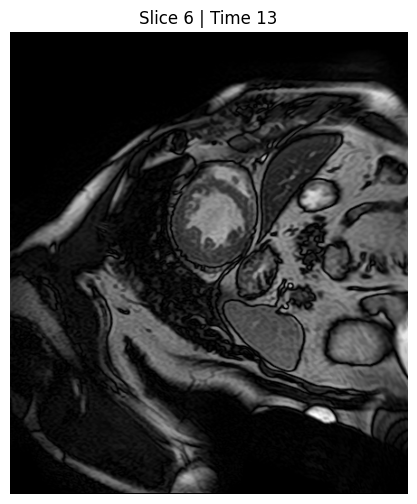

In [8]:
import matplotlib.pyplot as plt
image, mask, path = ds[0]

img_np = image.numpy()   # convert tensor to numpy

slice_idx = img_np.shape[2] // 2   # middle slice (≈6)
time_idx  = img_np.shape[3] // 2   # middle time frame (≈13)

plt.figure(figsize=(6,6))
plt.imshow(img_np[:, :, slice_idx, time_idx], cmap="gray")
plt.title(f"Slice {slice_idx} | Time {time_idx}")
plt.axis("off")
plt.show()


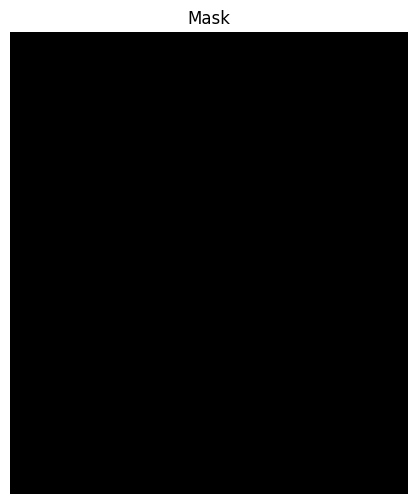

Mask unique values: [0 1 2 3]
Mask min: 0 max: 3


In [11]:
import matplotlib.pyplot as plt

image, mask, path = ds[0]
img_np = image.numpy()
mask_np = mask.numpy()

slice_idx = img_np.shape[2] // 2
time_idx = img_np.shape[3] // 2

plt.figure(figsize=(6,6))
plt.imshow(mask_np[:, :, slice_idx, time_idx], cmap="gray")
plt.title("Mask")
plt.axis("off")
plt.show()

import numpy as np

print("Mask unique values:", np.unique(mask_np))
print("Mask min:", mask_np.min(), "max:", mask_np.max())


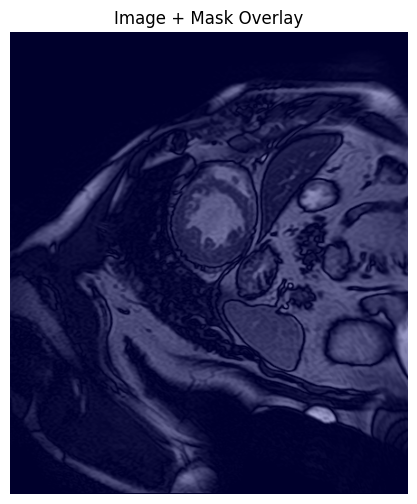

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(img_np[:, :, slice_idx, time_idx], cmap="gray")
plt.imshow(mask_np[:, :, slice_idx, time_idx], cmap="jet", alpha=0.35)
plt.title("Image + Mask Overlay")
plt.axis("off")
plt.show()


In [14]:
label_slices = []
for s in range(mask_np.shape[2]):
    if mask_np[:, :, s, :].sum() > 0:
        label_slices.append(s)

label_slices



[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [15]:
label_times = []
for t in range(mask_np.shape[3]):
    if mask_np[:, :, :, t].sum() > 0:
        label_times.append(t)

label_times


[10, 25]

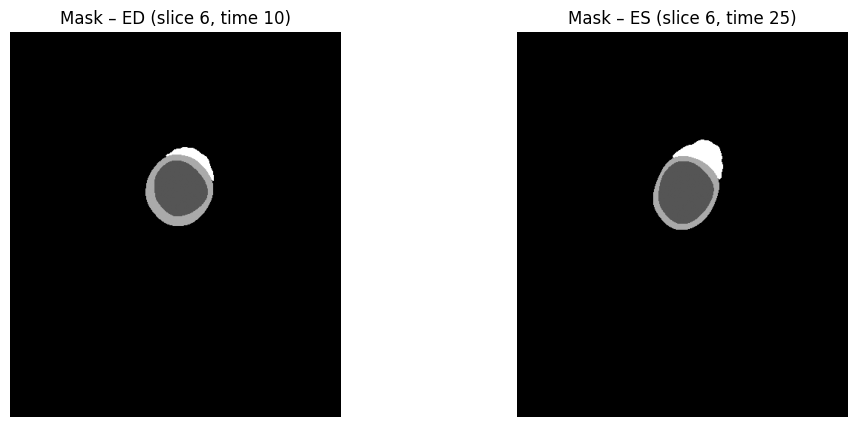

In [16]:
s = 6   # mid slice
t_ed = 10
t_es = 25

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(mask_np[:, :, s, t_ed], cmap="gray")
plt.title(f"Mask – ED (slice {s}, time {t_ed})")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask_np[:, :, s, t_es], cmap="gray")
plt.title(f"Mask – ES (slice {s}, time {t_es})")
plt.axis("off")

plt.show()


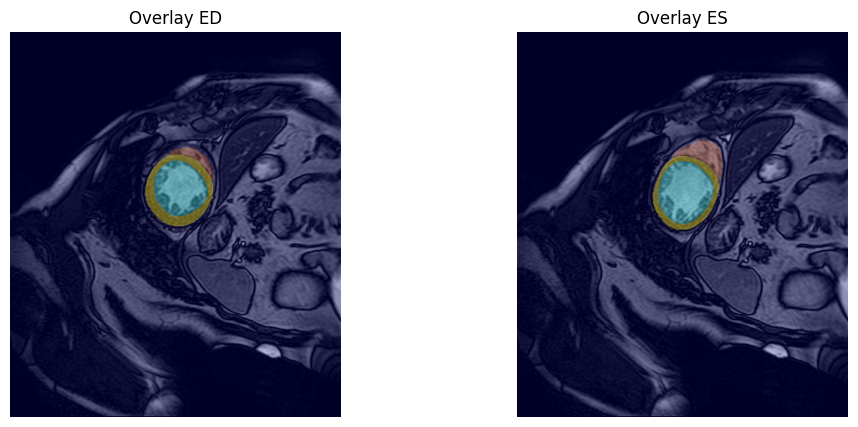

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_np[:, :, s, t_ed], cmap="gray")
plt.imshow(mask_np[:, :, s, t_ed], cmap="jet", alpha=0.3)
plt.title("Overlay ED")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_np[:, :, s, t_es], cmap="gray")
plt.imshow(mask_np[:, :, s, t_es], cmap="jet", alpha=0.3)
plt.title("Overlay ES")
plt.axis("off")

plt.show()
